In [1]:
# Install necessary libraries
!pip install --upgrade datasets scikit-learn

# Import libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 

In [2]:
# 1. Load the SMS Spam dataset
dataset = load_dataset("sms_spam")
texts = dataset['train']['sms']
labels = dataset['train']['label']

print(f"Total messages: {len(texts)}")
print(f"Class distribution: {np.bincount(labels)} (ham=0, spam=1)")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.98k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/359k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5574 [00:00<?, ? examples/s]

Total messages: 5574
Class distribution: [4827  747] (ham=0, spam=1)


In [3]:
# 2. Split dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

In [4]:
# 3. Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)


In [5]:
# 4. Fit TF-IDF on training data and transform both train/test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(f"Number of features (unique words): {X_train_tfidf.shape[1]}")

Number of features (unique words): 3349


In [6]:
# 5. Train Logistic Regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [7]:
# 6. Predict on test data
y_pred = clf.predict(X_test_tfidf)

In [8]:
 #7. Evaluation metrics

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


Accuracy: 0.9785


In [9]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



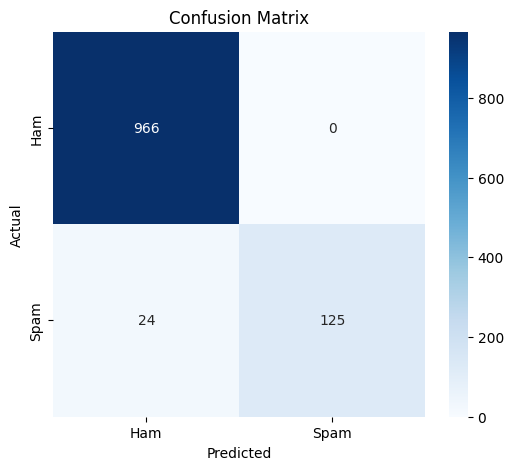

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
# 8. Optional: Extract top TF-IDF terms for each class

def top_tfidf_terms(vectorizer, clf, n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    # Coefficients for each feature in Logistic Regression
    coefs = clf.coef_[0]
    top_positive_indices = np.argsort(coefs)[-n:]
    top_negative_indices = np.argsort(coefs)[:n]

    print(f"Top {n} words indicative of Spam:")
    print(feature_names[top_positive_indices][::-1])
    print(f"\nTop {n} words indicative of Ham:")
    print(feature_names[top_negative_indices])

top_tfidf_terms(tfidf, clf)

Top 10 words indicative of Spam:
['txt' 'mobile' 'claim' 'uk' 'www' 'stop' 'reply' 'free' 'service' '150p']

Top 10 words indicative of Ham:
['ok' 'gt' 'lt' 'll' 'da' 'come' 'home' 'got' 'lor' 'good']


2 case study worst case

In [12]:
!pip install --upgrade datasets scikit-learn

from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load IMDb dataset
dataset = load_dataset("imdb")

# Take a small subset of 300 samples (balanced classes)
texts_pos = dataset['train'].filter(lambda x: x['label'] == 1).select(range(150))['text']
texts_neg = dataset['train'].filter(lambda x: x['label'] == 0).select(range(150))['text']

texts = texts_pos + texts_neg
labels = [1]*150 + [0]*150

print(f"Total samples: {len(texts)}")

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Total samples: 300


In [14]:
# Split train-test 80-20
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)


In [15]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [16]:
# Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

In [17]:
 #Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      1.00      0.94        30
    Positive       1.00      0.87      0.93        30

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



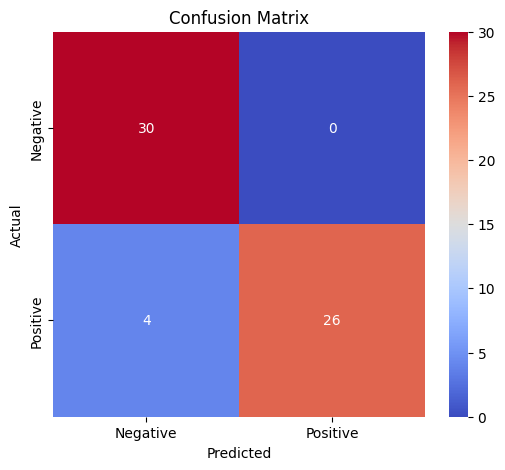

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

3
 1. Data Preprocessing

In [19]:
from datasets import load_dataset
import pandas as pd
import re

# Load Yelp Polarity dataset (subset)
dataset = load_dataset("yelp_polarity", split="train[:500]")
texts = dataset['text']
labels = dataset['label']  # 0 = negative, 1 = positive

# Cleaning function (basic)
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase
    text = re.sub(r'\d+', '', text)              # Remove numbers
    return text

texts_cleaned = [clean_text(t) for t in texts]


README.md:   0%|          | 0.00/8.93k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/256M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/560000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/38000 [00:00<?, ? examples/s]

 2. TF-IDF Computation & Model Implementation

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    texts_cleaned, labels, test_size=0.2, random_state=42, stratify=labels
)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=2, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)


 3. Evaluation Metrics

In [21]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


Accuracy: 0.72
              precision    recall  f1-score   support

    Negative       0.70      0.97      0.81        63
    Positive       0.85      0.30      0.44        37

    accuracy                           0.72       100
   macro avg       0.77      0.63      0.63       100
weighted avg       0.75      0.72      0.68       100



In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Get similarity between 2 random reviews
similarity = cosine_similarity(X_test_tfidf[0], X_test_tfidf[1])
print(f"Similarity between doc 1 & 2: {similarity[0][0]:.4f}")


Similarity between doc 1 & 2: 0.0653


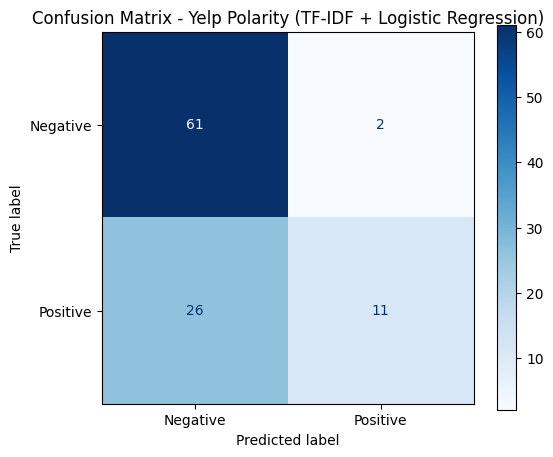

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

# Plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Yelp Polarity (TF-IDF + Logistic Regression)")
plt.show()


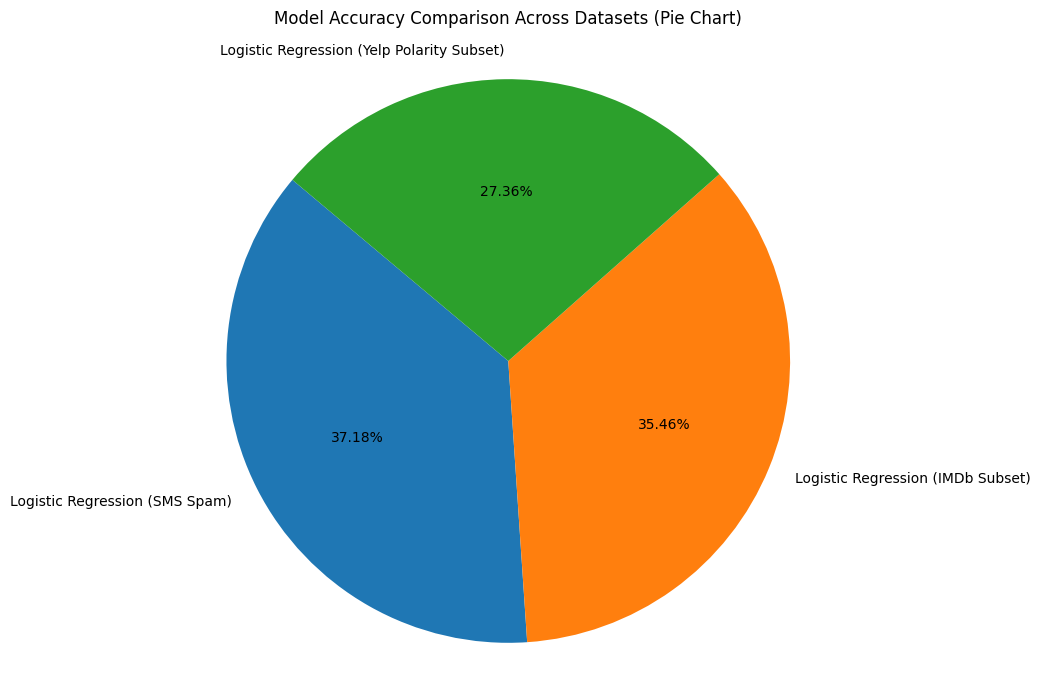


Metrics used for the pie chart:
                                        model  accuracy
0              Logistic Regression (SMS Spam)    0.9785
1           Logistic Regression (IMDb Subset)    0.9333
2  Logistic Regression (Yelp Polarity Subset)    0.7200


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_metrics_named = [{
    "model": "Logistic Regression (SMS Spam)",
    "accuracy": 0.9785,
    "precision": 1.0,
    "recall": 0.84,
    "f1_score": 0.91
}]

model_metrics_named.append({
    "model": "Logistic Regression (IMDb Subset)",
    "accuracy": 0.9333,
})

model_metrics_named.append({
    "model": "Logistic Regression (Yelp Polarity Subset)",
    "accuracy": 0.72,
})


labels = [m["model"] for m in model_metrics_named]
accuracies = [m["accuracy"] for m in model_metrics_named]

plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=labels, autopct='%1.2f%%', startangle=140)
plt.title("Model Accuracy Comparison Across Datasets (Pie Chart)\n")
plt.axis('equal')
plt.show()


df_metrics = pd.DataFrame(model_metrics_named)
print("\nMetrics used for the pie chart:")
print(df_metrics[['model', 'accuracy']])

<ipython-input-25-18f9f9a4882f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette='viridis') # Create the bar plot


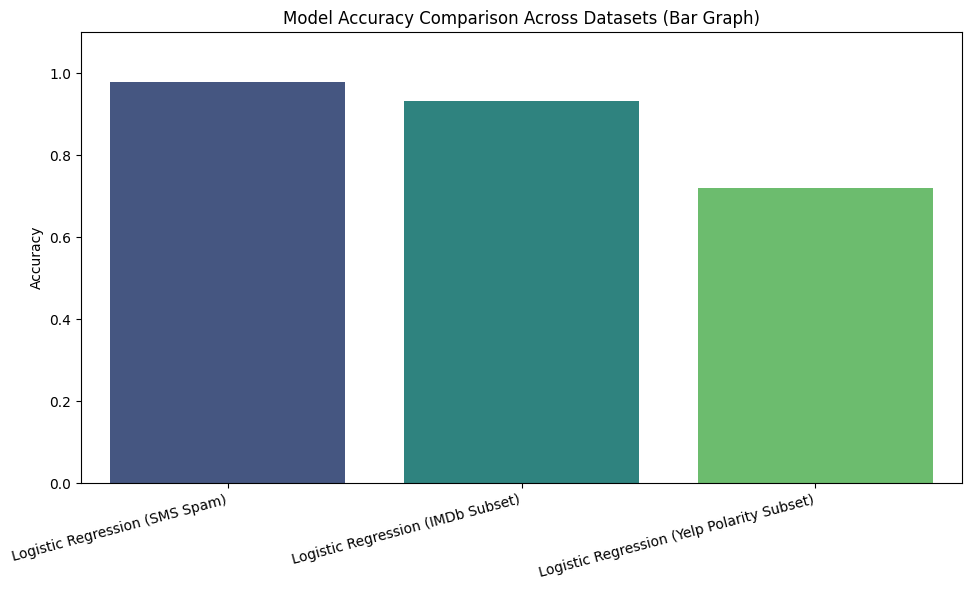


Metrics used for the plots:
                                        model  accuracy
0              Logistic Regression (SMS Spam)    0.9785
1           Logistic Regression (IMDb Subset)    0.9333
2  Logistic Regression (Yelp Polarity Subset)    0.7200


In [25]:
# --- Create Bar Graph ---
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=accuracies, palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Across Datasets (Bar Graph)')
plt.ylim(0, 1.1)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()



df_metrics = pd.DataFrame(model_metrics_named)
print("\nMetrics used for the plots:")
print(df_metrics[['model', 'accuracy']]) # Only show th